In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: VALE
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


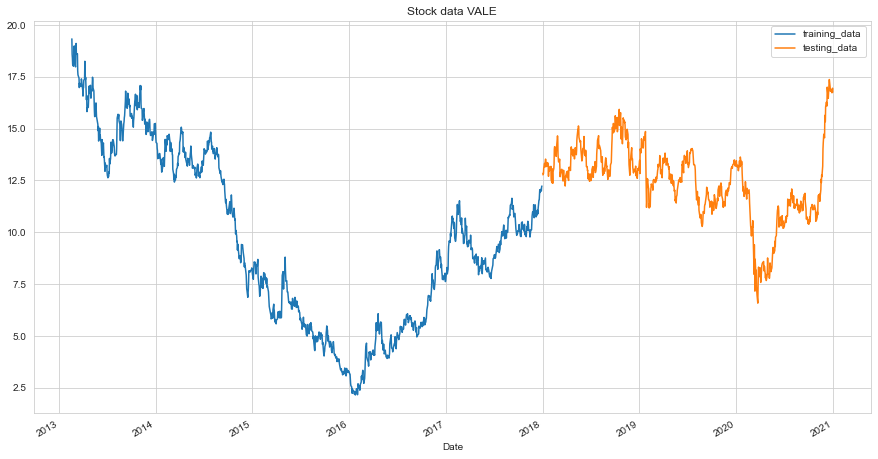

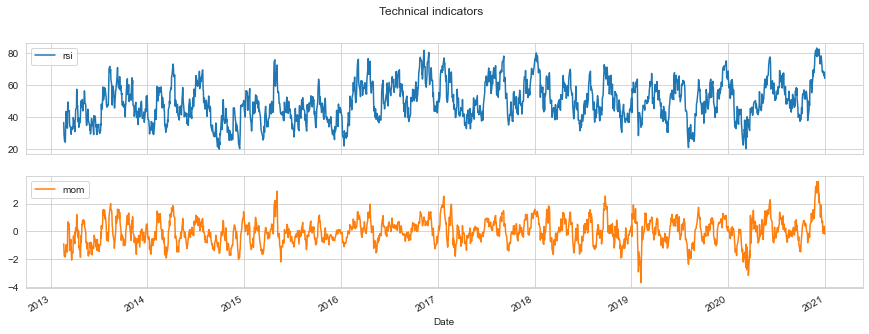

In [2]:
stock_name = 'vale'.upper()
industry = 'Basic Materials'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1120.50, duration: 0:00:00.456103
episode: 2/2000, episode end value: 1146.81, duration: 0:00:00.519116
episode: 3/2000, episode end value: 1184.19, duration: 0:00:00.440099
episode: 4/2000, episode end value: 1155.88, duration: 0:00:00.402091
episode: 5/2000, episode end value: 1306.20, duration: 0:00:00.348076
episode: 6/2000, episode end value: 1114.72, duration: 0:00:00.345077
episode: 7/2000, episode end value: 1216.28, duration: 0:00:00.382086
episode: 8/2000, episode end value: 1103.63, duration: 0:00:00.388087
episode: 9/2000, episode end value: 1240.34, duration: 0:00:00.369081
episode: 10/2000, episode end value: 1075.76, duration: 0:00:00.373085
episode: 11/2000, episode end value: 1071.76, duration: 0:00:00.501115
episode: 12/2000, episode end value: 1062.17, duration: 0:00:00.431094
episode: 13/2000, episode end value: 1495.27, duration: 0:00:00.359082
episode: 14/2000, episode end value: 1036.71, duration: 0:00:00.406092
episode: 15/200

episode: 117/2000, episode end value: 1084.78, duration: 0:00:00.351077
episode: 118/2000, episode end value: 1130.48, duration: 0:00:00.343140
episode: 119/2000, episode end value: 1140.15, duration: 0:00:00.459792
episode: 120/2000, episode end value: 1176.42, duration: 0:00:00.440226
episode: 121/2000, episode end value: 1123.66, duration: 0:00:00.390090
episode: 122/2000, episode end value: 1060.32, duration: 0:00:00.410094
episode: 123/2000, episode end value: 1235.24, duration: 0:00:00.405091
episode: 124/2000, episode end value: 1099.68, duration: 0:00:00.377087
episode: 125/2000, episode end value: 1112.88, duration: 0:00:00.382084
episode: 126/2000, episode end value: 1075.38, duration: 0:00:00.376085
episode: 127/2000, episode end value: 1232.12, duration: 0:00:00.432097
episode: 128/2000, episode end value: 1089.98, duration: 0:00:00.363081
episode: 129/2000, episode end value: 1092.78, duration: 0:00:00.378088
episode: 130/2000, episode end value: 1096.06, duration: 0:00:00

episode: 231/2000, episode end value: 1136.86, duration: 0:00:00.422104
episode: 232/2000, episode end value: 1124.54, duration: 0:00:00.370079
episode: 233/2000, episode end value: 1141.31, duration: 0:00:00.408090
episode: 234/2000, episode end value: 1216.55, duration: 0:00:00.428097
episode: 235/2000, episode end value: 1128.55, duration: 0:00:00.373089
episode: 236/2000, episode end value: 1164.11, duration: 0:00:00.401709
episode: 237/2000, episode end value: 1196.21, duration: 0:00:00.401419
episode: 238/2000, episode end value: 1269.76, duration: 0:00:00.425101
episode: 239/2000, episode end value: 1089.85, duration: 0:00:00.415095
episode: 240/2000, episode end value: 1117.49, duration: 0:00:00.373082
episode: 241/2000, episode end value: 1131.79, duration: 0:00:00.432097
episode: 242/2000, episode end value: 1308.04, duration: 0:00:00.334075
episode: 243/2000, episode end value: 1116.10, duration: 0:00:00.390088
episode: 244/2000, episode end value: 1114.23, duration: 0:00:00

episode: 345/2000, episode end value: 1118.98, duration: 0:00:00.387087
episode: 346/2000, episode end value: 1091.04, duration: 0:00:00.428099
episode: 347/2000, episode end value: 1143.87, duration: 0:00:00.371087
episode: 348/2000, episode end value: 1069.42, duration: 0:00:00.467104
episode: 349/2000, episode end value: 1084.54, duration: 0:00:00.456075
episode: 350/2000, episode end value: 1098.22, duration: 0:00:00.397090
episode: 351/2000, episode end value: 1081.39, duration: 0:00:00.380106
episode: 352/2000, episode end value: 1096.30, duration: 0:00:00.407134
episode: 353/2000, episode end value: 1190.10, duration: 0:00:00.435102
episode: 354/2000, episode end value: 1025.05, duration: 0:00:00.395084
episode: 355/2000, episode end value: 1162.51, duration: 0:00:00.373088
episode: 356/2000, episode end value: 1095.28, duration: 0:00:00.385081
episode: 357/2000, episode end value: 1147.50, duration: 0:00:00.330066
episode: 358/2000, episode end value: 1112.85, duration: 0:00:00

episode: 459/2000, episode end value: 1116.98, duration: 0:00:00.392085
episode: 460/2000, episode end value: 1166.51, duration: 0:00:00.363078
episode: 461/2000, episode end value: 1109.10, duration: 0:00:00.347077
episode: 462/2000, episode end value: 1061.03, duration: 0:00:00.423093
episode: 463/2000, episode end value: 1049.46, duration: 0:00:00.397089
episode: 464/2000, episode end value: 1050.67, duration: 0:00:00.363142
episode: 465/2000, episode end value: 1111.50, duration: 0:00:00.420876
episode: 466/2000, episode end value: 1059.29, duration: 0:00:00.388129
episode: 467/2000, episode end value: 1023.45, duration: 0:00:00.399091
episode: 468/2000, episode end value: 1023.51, duration: 0:00:00.382086
episode: 469/2000, episode end value: 1041.72, duration: 0:00:00.359082
episode: 470/2000, episode end value: 1109.65, duration: 0:00:00.400091
episode: 471/2000, episode end value: 1100.40, duration: 0:00:00.402087
episode: 472/2000, episode end value: 1023.01, duration: 0:00:00

episode: 573/2000, episode end value: 1078.16, duration: 0:00:00.388085
episode: 574/2000, episode end value: 1045.43, duration: 0:00:00.352077
episode: 575/2000, episode end value: 1168.01, duration: 0:00:00.348943
episode: 576/2000, episode end value: 1162.56, duration: 0:00:00.420093
episode: 577/2000, episode end value: 1101.27, duration: 0:00:00.415088
episode: 578/2000, episode end value: 1149.49, duration: 0:00:00.415092
episode: 579/2000, episode end value: 1086.63, duration: 0:00:00.388087
episode: 580/2000, episode end value: 1081.68, duration: 0:00:00.371092
episode: 581/2000, episode end value: 1156.40, duration: 0:00:00.385086
episode: 582/2000, episode end value: 1171.64, duration: 0:00:00.421074
episode: 583/2000, episode end value: 1109.35, duration: 0:00:00.417094
episode: 584/2000, episode end value: 1238.28, duration: 0:00:00.400091
episode: 585/2000, episode end value: 1141.28, duration: 0:00:00.393088
episode: 586/2000, episode end value: 1279.02, duration: 0:00:00

episode: 687/2000, episode end value: 1165.36, duration: 0:00:00.439100
episode: 688/2000, episode end value: 1110.96, duration: 0:00:00.412805
episode: 689/2000, episode end value: 1259.47, duration: 0:00:00.349911
episode: 690/2000, episode end value: 1089.75, duration: 0:00:00.491110
episode: 691/2000, episode end value: 1162.82, duration: 0:00:00.474106
episode: 692/2000, episode end value: 1208.06, duration: 0:00:00.412090
episode: 693/2000, episode end value: 1092.04, duration: 0:00:00.333082
episode: 694/2000, episode end value: 1108.39, duration: 0:00:00.383082
episode: 695/2000, episode end value: 1166.18, duration: 0:00:00.399091
episode: 696/2000, episode end value: 1213.56, duration: 0:00:00.433096
episode: 697/2000, episode end value: 1104.34, duration: 0:00:00.419100
episode: 698/2000, episode end value: 1103.51, duration: 0:00:00.403265
episode: 699/2000, episode end value: 1212.17, duration: 0:00:00.398006
episode: 700/2000, episode end value: 1095.23, duration: 0:00:00

episode: 801/2000, episode end value: 1035.39, duration: 0:00:00.426101
episode: 802/2000, episode end value: 1103.97, duration: 0:00:00.387083
episode: 803/2000, episode end value: 1038.40, duration: 0:00:00.421097
episode: 804/2000, episode end value: 1070.34, duration: 0:00:00.342595
episode: 805/2000, episode end value: 1023.12, duration: 0:00:00.322127
episode: 806/2000, episode end value: 1044.97, duration: 0:00:00.381273
episode: 807/2000, episode end value: 1118.04, duration: 0:00:00.391339
episode: 808/2000, episode end value: 1118.55, duration: 0:00:00.368320
episode: 809/2000, episode end value: 1112.90, duration: 0:00:00.434097
episode: 810/2000, episode end value: 1096.92, duration: 0:00:00.417092
episode: 811/2000, episode end value: 1138.04, duration: 0:00:00.425097
episode: 812/2000, episode end value: 1081.28, duration: 0:00:00.402091
episode: 813/2000, episode end value: 1147.28, duration: 0:00:00.370082
episode: 814/2000, episode end value: 1071.47, duration: 0:00:00

episode: 915/2000, episode end value: 1081.17, duration: 0:00:00.521121
episode: 916/2000, episode end value: 1080.16, duration: 0:00:00.493109
episode: 917/2000, episode end value: 1080.37, duration: 0:00:00.545709
episode: 918/2000, episode end value: 1079.95, duration: 0:00:00.527732
episode: 919/2000, episode end value: 1080.92, duration: 0:00:00.550014
episode: 920/2000, episode end value: 1079.93, duration: 0:00:00.502114
episode: 921/2000, episode end value: 1081.13, duration: 0:00:00.533122
episode: 922/2000, episode end value: 1081.68, duration: 0:00:00.533122
episode: 923/2000, episode end value: 1079.44, duration: 0:00:00.544123
episode: 924/2000, episode end value: 1078.31, duration: 0:00:00.442098
episode: 925/2000, episode end value: 1190.77, duration: 0:00:00.423097
episode: 926/2000, episode end value: 1030.85, duration: 0:00:00.359080
episode: 927/2000, episode end value: 1276.81, duration: 0:00:00.311071
episode: 928/2000, episode end value: 1094.06, duration: 0:00:00

episode: 1029/2000, episode end value: 1052.66, duration: 0:00:00.417105
episode: 1030/2000, episode end value: 1151.24, duration: 0:00:00.369688
episode: 1031/2000, episode end value: 1173.67, duration: 0:00:00.355534
episode: 1032/2000, episode end value: 1062.76, duration: 0:00:00.398091
episode: 1033/2000, episode end value: 1035.56, duration: 0:00:00.406090
episode: 1034/2000, episode end value: 1073.59, duration: 0:00:00.359084
episode: 1035/2000, episode end value: 1117.91, duration: 0:00:00.358078
episode: 1036/2000, episode end value: 1082.29, duration: 0:00:00.351083
episode: 1037/2000, episode end value: 1242.30, duration: 0:00:00.374086
episode: 1038/2000, episode end value: 1086.62, duration: 0:00:00.514120
episode: 1039/2000, episode end value: 1086.72, duration: 0:00:00.436089
episode: 1040/2000, episode end value: 1161.41, duration: 0:00:00.425095
episode: 1041/2000, episode end value: 1075.28, duration: 0:00:00.380083
episode: 1042/2000, episode end value: 1137.24, dur

episode: 1142/2000, episode end value: 1041.52, duration: 0:00:00.390084
episode: 1143/2000, episode end value: 1057.67, duration: 0:00:00.431647
episode: 1144/2000, episode end value: 1191.73, duration: 0:00:00.366965
episode: 1145/2000, episode end value: 1077.70, duration: 0:00:00.320288
episode: 1146/2000, episode end value: 1065.07, duration: 0:00:00.365174
episode: 1147/2000, episode end value: 1068.89, duration: 0:00:00.394092
episode: 1148/2000, episode end value: 1224.84, duration: 0:00:00.258058
episode: 1149/2000, episode end value: 1110.67, duration: 0:00:00.375085
episode: 1150/2000, episode end value: 1085.04, duration: 0:00:00.388086
episode: 1151/2000, episode end value: 1279.85, duration: 0:00:00.388087
episode: 1152/2000, episode end value: 1185.78, duration: 0:00:00.351080
episode: 1153/2000, episode end value: 1110.71, duration: 0:00:00.364081
episode: 1154/2000, episode end value: 1203.99, duration: 0:00:00.400090
episode: 1155/2000, episode end value: 1178.57, dur

episode: 1255/2000, episode end value: 1189.10, duration: 0:00:00.351083
episode: 1256/2000, episode end value: 1065.53, duration: 0:00:00.465099
episode: 1257/2000, episode end value: 1093.43, duration: 0:00:00.426095
episode: 1258/2000, episode end value: 1101.08, duration: 0:00:00.418093
episode: 1259/2000, episode end value: 1106.77, duration: 0:00:00.468108
episode: 1260/2000, episode end value: 1286.37, duration: 0:00:00.402610
episode: 1261/2000, episode end value: 1217.72, duration: 0:00:00.359081
episode: 1262/2000, episode end value: 1085.28, duration: 0:00:00.396356
episode: 1263/2000, episode end value: 1096.72, duration: 0:00:00.460099
episode: 1264/2000, episode end value: 1082.48, duration: 0:00:00.428098
episode: 1265/2000, episode end value: 1101.94, duration: 0:00:00.380086
episode: 1266/2000, episode end value: 1086.81, duration: 0:00:00.393085
episode: 1267/2000, episode end value: 1215.82, duration: 0:00:00.429100
episode: 1268/2000, episode end value: 1116.82, dur

episode: 1368/2000, episode end value: 1168.82, duration: 0:00:00.438098
episode: 1369/2000, episode end value: 1204.11, duration: 0:00:00.360082
episode: 1370/2000, episode end value: 1124.69, duration: 0:00:00.381090
episode: 1371/2000, episode end value: 1129.33, duration: 0:00:00.387085
episode: 1372/2000, episode end value: 1186.16, duration: 0:00:00.407091
episode: 1373/2000, episode end value: 1106.62, duration: 0:00:00.440104
episode: 1374/2000, episode end value: 1091.75, duration: 0:00:00.322069
episode: 1375/2000, episode end value: 1103.43, duration: 0:00:00.403092
episode: 1376/2000, episode end value: 1073.87, duration: 0:00:00.419090
episode: 1377/2000, episode end value: 1084.89, duration: 0:00:00.347079
episode: 1378/2000, episode end value: 1080.51, duration: 0:00:00.364081
episode: 1379/2000, episode end value: 1036.68, duration: 0:00:00.360080
episode: 1380/2000, episode end value: 1178.58, duration: 0:00:00.418095
episode: 1381/2000, episode end value: 1119.27, dur

episode: 1481/2000, episode end value: 1072.43, duration: 0:00:00.376084
episode: 1482/2000, episode end value: 1069.46, duration: 0:00:00.373086
episode: 1483/2000, episode end value: 1063.64, duration: 0:00:00.383086
episode: 1484/2000, episode end value: 1071.55, duration: 0:00:00.346081
episode: 1485/2000, episode end value: 1195.94, duration: 0:00:00.453100
episode: 1486/2000, episode end value: 1172.81, duration: 0:00:00.393087
episode: 1487/2000, episode end value: 1199.65, duration: 0:00:00.386088
episode: 1488/2000, episode end value: 1059.21, duration: 0:00:00.487109
episode: 1489/2000, episode end value: 1074.66, duration: 0:00:00.402094
episode: 1490/2000, episode end value: 1263.55, duration: 0:00:00.394084
episode: 1491/2000, episode end value: 1081.77, duration: 0:00:00.429093
episode: 1492/2000, episode end value: 1237.27, duration: 0:00:00.323076
episode: 1493/2000, episode end value: 1193.86, duration: 0:00:00.402088
episode: 1494/2000, episode end value: 1093.17, dur

episode: 1594/2000, episode end value: 1099.27, duration: 0:00:00.389088
episode: 1595/2000, episode end value: 1099.96, duration: 0:00:00.371085
episode: 1596/2000, episode end value: 1044.77, duration: 0:00:00.387087
episode: 1597/2000, episode end value: 1073.76, duration: 0:00:00.364081
episode: 1598/2000, episode end value: 1024.16, duration: 0:00:00.399657
episode: 1599/2000, episode end value: 1057.41, duration: 0:00:00.375088
episode: 1600/2000, episode end value: 1033.49, duration: 0:00:00.342075
episode: 1601/2000, episode end value: 1026.47, duration: 0:00:00.373612
episode: 1602/2000, episode end value: 1058.28, duration: 0:00:00.306075
episode: 1603/2000, episode end value: 1059.84, duration: 0:00:00.301062
episode: 1604/2000, episode end value: 1082.21, duration: 0:00:00.348076
episode: 1605/2000, episode end value: 1112.05, duration: 0:00:00.315073
episode: 1606/2000, episode end value: 1145.46, duration: 0:00:00.333073
episode: 1607/2000, episode end value: 1123.36, dur

episode: 1707/2000, episode end value: 1093.78, duration: 0:00:00.322068
episode: 1708/2000, episode end value: 1101.30, duration: 0:00:00.332075
episode: 1709/2000, episode end value: 1197.22, duration: 0:00:00.390090
episode: 1710/2000, episode end value: 1088.96, duration: 0:00:00.337074
episode: 1711/2000, episode end value: 1093.30, duration: 0:00:00.415092
episode: 1712/2000, episode end value: 1077.45, duration: 0:00:00.348084
episode: 1713/2000, episode end value: 1113.63, duration: 0:00:00.284059
episode: 1714/2000, episode end value: 1125.25, duration: 0:00:00.343080
episode: 1715/2000, episode end value: 1197.36, duration: 0:00:00.370083
episode: 1716/2000, episode end value: 1150.67, duration: 0:00:00.319072
episode: 1717/2000, episode end value: 1177.76, duration: 0:00:00.318076
episode: 1718/2000, episode end value: 1218.10, duration: 0:00:00.334075
episode: 1719/2000, episode end value: 1144.51, duration: 0:00:00.302065
episode: 1720/2000, episode end value: 1088.97, dur

episode: 1820/2000, episode end value: 1097.23, duration: 0:00:00.329076
episode: 1821/2000, episode end value: 1066.70, duration: 0:00:00.328074
episode: 1822/2000, episode end value: 1070.85, duration: 0:00:00.324075
episode: 1823/2000, episode end value: 1091.29, duration: 0:00:00.354083
episode: 1824/2000, episode end value: 1133.91, duration: 0:00:00.292068
episode: 1825/2000, episode end value: 1246.34, duration: 0:00:00.331072
episode: 1826/2000, episode end value: 1136.88, duration: 0:00:00.333078
episode: 1827/2000, episode end value: 1180.54, duration: 0:00:00.309067
episode: 1828/2000, episode end value: 1131.77, duration: 0:00:00.298066
episode: 1829/2000, episode end value: 1300.82, duration: 0:00:00.323072
episode: 1830/2000, episode end value: 1144.32, duration: 0:00:00.344083
episode: 1831/2000, episode end value: 1115.35, duration: 0:00:00.311068
episode: 1832/2000, episode end value: 1087.05, duration: 0:00:00.322071
episode: 1833/2000, episode end value: 1075.01, dur

episode: 1933/2000, episode end value: 1216.47, duration: 0:00:00.309069
episode: 1934/2000, episode end value: 1126.42, duration: 0:00:00.304070
episode: 1935/2000, episode end value: 1088.01, duration: 0:00:00.326076
episode: 1936/2000, episode end value: 1090.38, duration: 0:00:00.297066
episode: 1937/2000, episode end value: 1083.03, duration: 0:00:00.341072
episode: 1938/2000, episode end value: 1173.95, duration: 0:00:00.285067
episode: 1939/2000, episode end value: 1072.97, duration: 0:00:00.324067
episode: 1940/2000, episode end value: 1311.88, duration: 0:00:00.256059
episode: 1941/2000, episode end value: 1097.57, duration: 0:00:00.322067
episode: 1942/2000, episode end value: 1082.91, duration: 0:00:00.361085
episode: 1943/2000, episode end value: 1147.02, duration: 0:00:00.313066
episode: 1944/2000, episode end value: 1145.19, duration: 0:00:00.274056
episode: 1945/2000, episode end value: 1219.40, duration: 0:00:00.251059
episode: 1946/2000, episode end value: 1129.37, dur

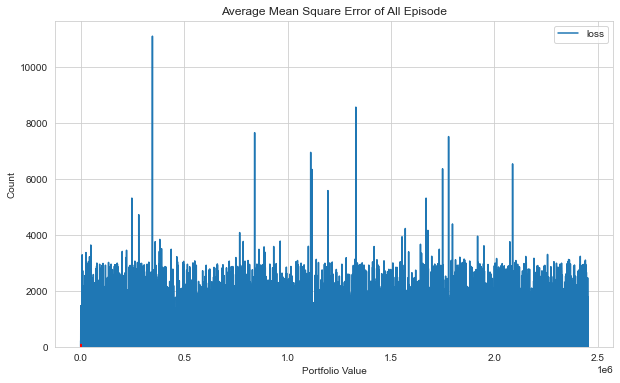

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

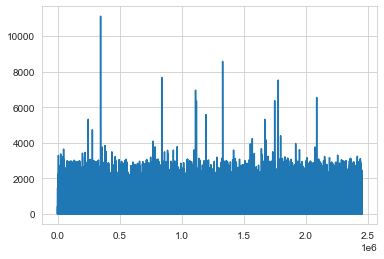

In [5]:
plt.plot(agent.model.losses)

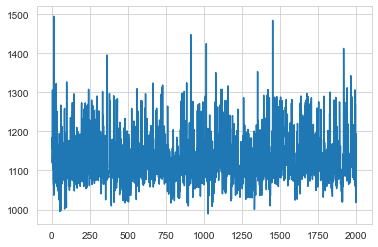

In [6]:
plt.plot(portfolio_value)

episode end value: 1156.37, duration: 0:00:00.079015
Sell: 118 times, Buy: 106 times


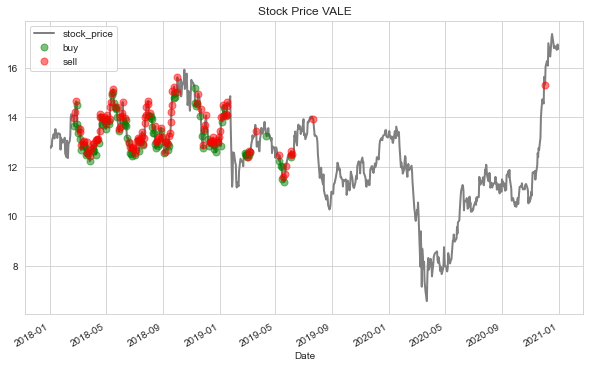

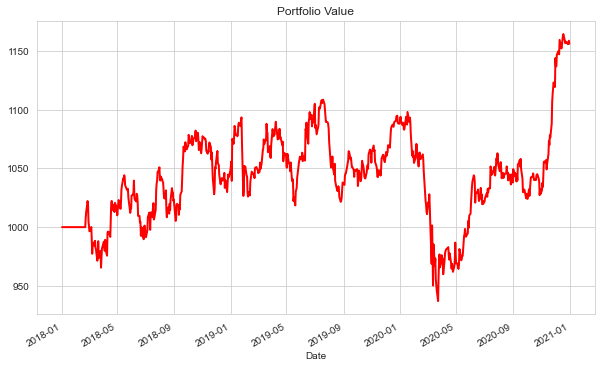

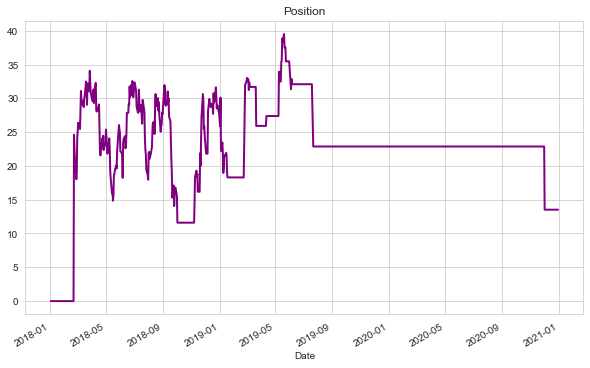

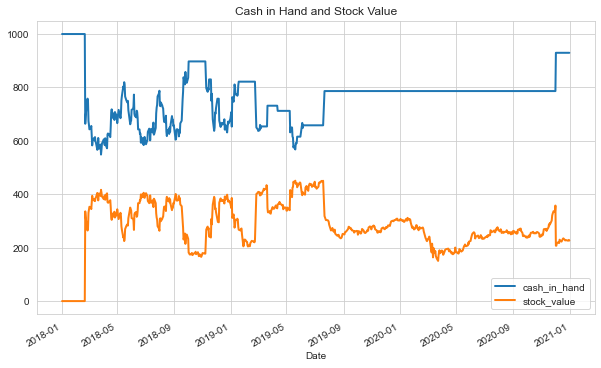

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: VALE
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 4.96 %
Volatility: 0.1159
shape ratio: 0.3331
Maximun drawdown: -15.49 %
Calmar ratio: 0.3204
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 9.49 %
Volatility (benchmark): 0.4691
shape ratio: 0.1788
Maximun drawdown: -58.69 %
Calmar ratio (benchmark): 0.1616


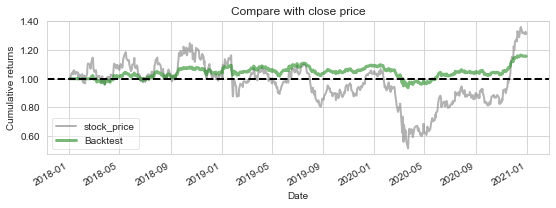

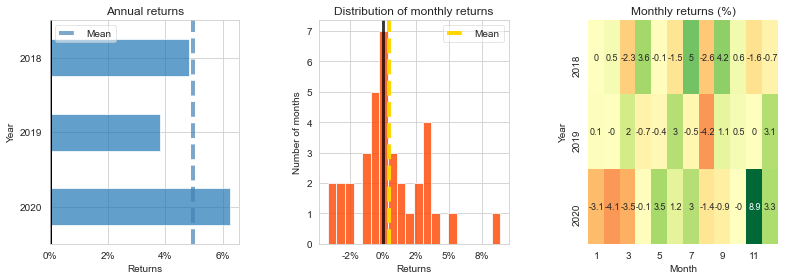

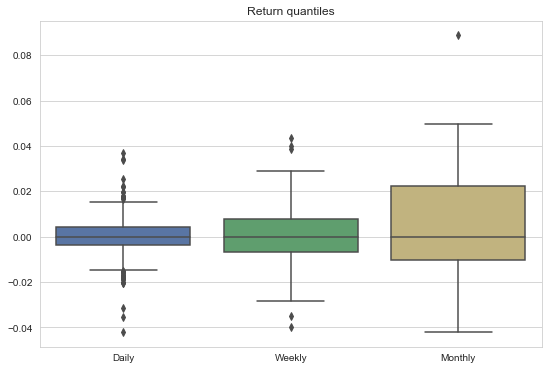

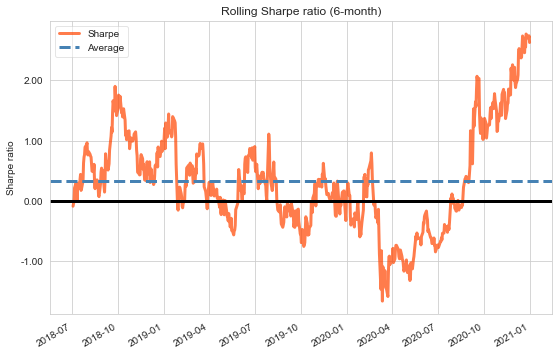

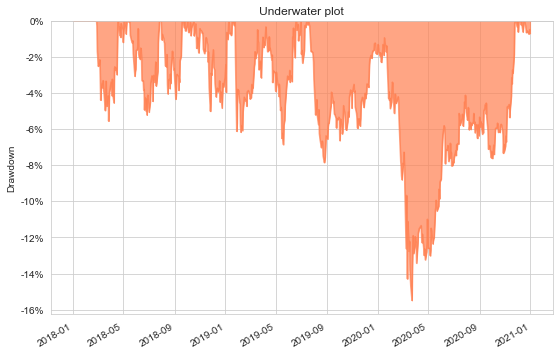

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')